In [50]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.style.use('ggplot')
mpl.rcParams['axes.unicode_minus'] = False

import warnings
warnings.filterwarnings('ignore')

import os
os.chdir('C:\\machine')

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
import warnings
pd.options.mode.chained_assignment = None
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [51]:
train = pd.read_csv("train_1.csv")
train.shape


(5481, 23)

In [52]:
test = pd.read_csv("test_1.csv")
test.shape

(1827, 23)

In [53]:
feature_names = ["weekday","weekend","mor","after","even","cover","road_l","entroph","bus_sta","subway","farea_A","farea_B","farea_C","farea_D","farea_E","farea_G","farea_H","farea_I","farea_J","farea_K","park_"]
feature_names

['weekday',
 'weekend',
 'mor',
 'after',
 'even',
 'cover',
 'road_l',
 'entroph',
 'bus_sta',
 'subway',
 'farea_A',
 'farea_B',
 'farea_C',
 'farea_D',
 'farea_E',
 'farea_G',
 'farea_H',
 'farea_I',
 'farea_J',
 'farea_K',
 'park_']

In [54]:
X_train = train[feature_names]

print(X_train.shape)
print(X_train.head())
X_test = test[feature_names]

print(X_test.shape)
print(X_test.head())
label_name = "pop"

y_train = train[label_name]
y_test = test[label_name]
print(y_train.head())

(5481, 21)
   weekday  weekend  mor  after  even     cover    road_l   entroph   bus_sta  \
0        1        0    1      0     0  0.494579  0.293336  0.938266  0.276596   
1        0        1    0      0     1  0.561740  0.633447  0.022005  0.446809   
2        1        0    1      0     0  0.563192  0.554696  0.104860  0.319149   
3        1        0    1      0     0  0.602839  0.622545  0.548271  0.191489   
4        0        1    0      0     1  0.883886  0.847966  0.941868  0.212766   

     subway    ...      farea_B   farea_C   farea_D   farea_E   farea_G  \
0  0.065589    ...     0.120805  0.028333  0.000000  0.001590  0.082723   
1  0.110831    ...     0.049631  0.000000  0.000000  0.000000  0.002312   
2  0.125210    ...     0.272878  0.004311  0.003192  0.072981  0.014798   
3  0.066887    ...     0.045487  0.000000  0.000000  0.000000  0.000193   
4  0.160596    ...     0.106159  0.001275  0.000000  0.000000  0.000000   

    farea_H   farea_I   farea_J  farea_K     park_ 

In [49]:
# count값의 데이터 분포도를 파악

sns.distplot(train["pop"], ax=axes[0][0])
stats.probplot(train["pop"], fit=True, plot=axes[0][1])

TypeError: 'AxesSubplot' object does not support indexing

In [55]:
from sklearn.metrics import make_scorer

def rmsle(predicted_values, actual_values):
    # 넘파이로 배열 형태로 바꿔준다.
    predicted_values = np.array(predicted_values)
    actual_values = np.array(actual_values)
    
    # 예측값과 실제 값에 1을 더하고 로그를 씌워준다.
    log_predict = np.log(predicted_values + 1)
    log_actual = np.log(actual_values + 1)
    
    # 위에서 계산한 예측값에서 실제값을 빼주고 제곱을 해준다.
    difference = log_predict - log_actual
    # difference = (log_predict - log_actual) ** 2
    difference = np.square(difference)
    
    # 평균을 낸다.
    mean_difference = difference.mean()
    
    # 다시 루트를 씌운다.
    score = np.sqrt(mean_difference)
    
    return score

rmsle_scorer = make_scorer(rmsle)
rmsle_scorer

make_scorer(rmsle)

In [56]:
#RMSE SCORER
from sklearn.metrics import make_scorer

def rmse(predicted_values, actual_values):

    difference = predicted_values - actual_values
    
    mean_difference = difference.mean()
    
    score = np.sqrt(mean_difference)
    
    return score

rmse_scorer = make_scorer(rmse)
rmse_scorer

make_scorer(rmse)

In [57]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
activation = 'logistic'
# 'neg_mean_sqauare_error'   'rmsle_scorer'
scoring = 'neg_mean_squared_error'
alpha = 0.001
learning_rate_init = 0.05
nn = MLPRegressor(hidden_layer_sizes=(10,10,),  activation= activation, solver='adam', alpha= alpha, batch_size='auto',
                  learning_rate='constant', learning_rate_init= learning_rate_init, power_t=0.5, max_iter=1000, shuffle=True,
                  random_state=9, tol=0.0001, verbose=False, warm_start=False, momentum=0.9, nesterovs_momentum=True,
                  early_stopping=False, validation_fraction=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-08)
nn.fit(X_train, y_train)
score = cross_val_score(nn, X_train, y_train, cv=k_fold, scoring = scoring )
print("10,10",round(np.mean(score)*100,2))
nn = MLPRegressor(hidden_layer_sizes=(10,20,),  activation= activation, solver='adam', alpha= alpha, batch_size='auto',
                  learning_rate='constant', learning_rate_init= learning_rate_init, power_t=0.5, max_iter=1000, shuffle=True,
                  random_state=9, tol=0.0001, verbose=False, warm_start=False, momentum=0.9, nesterovs_momentum=True,
                  early_stopping=False, validation_fraction=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-08)
nn.fit(X_train, y_train)
score = cross_val_score(nn, X_train, y_train, cv=k_fold, scoring = scoring )
print("10,20",round(np.mean(score)*100,2))
nn = MLPRegressor(hidden_layer_sizes=(10,30,),  activation= activation, solver='adam', alpha= alpha, batch_size='auto',
                  learning_rate='constant', learning_rate_init= learning_rate_init, power_t=0.5, max_iter=1000, shuffle=True,
                  random_state=9, tol=0.0001, verbose=False, warm_start=False, momentum=0.9, nesterovs_momentum=True,
                  early_stopping=False, validation_fraction=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-08)
nn.fit(X_train, y_train)
score = cross_val_score(nn, X_train, y_train, cv=k_fold, scoring = scoring)
print("10,30",round(np.mean(score)*100,2))
nn = MLPRegressor(hidden_layer_sizes=(10,40,),  activation= activation, solver='adam', alpha= alpha, batch_size='auto',
                  learning_rate='constant', learning_rate_init= learning_rate_init, power_t=0.5, max_iter=1000, shuffle=True,
                  random_state=9, tol=0.0001, verbose=False, warm_start=False, momentum=0.9, nesterovs_momentum=True,
                  early_stopping=False, validation_fraction=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-08)
nn.fit(X_train, y_train)
score = cross_val_score(nn, X_train, y_train, cv=k_fold, scoring = scoring)
print("10,40",round(np.mean(score)*100,2))
nn = MLPRegressor(hidden_layer_sizes=(20,10,),  activation= activation, solver='adam', alpha= alpha, batch_size='auto',
                  learning_rate='constant', learning_rate_init= learning_rate_init, power_t=0.5, max_iter=1000, shuffle=True,
                  random_state=9, tol=0.0001, verbose=False, warm_start=False, momentum=0.9, nesterovs_momentum=True,
                  early_stopping=False, validation_fraction=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-08)
nn.fit(X_train, y_train)
score = cross_val_score(nn, X_train, y_train, cv=k_fold, scoring = scoring)
print("20,10",round(np.mean(score)*100,2))
nn = MLPRegressor(hidden_layer_sizes=(20,20,),  activation= activation, solver='adam', alpha= alpha, batch_size='auto',
                  learning_rate='constant', learning_rate_init= learning_rate_init, power_t=0.5, max_iter=1000, shuffle=True,
                  random_state=9, tol=0.0001, verbose=False, warm_start=False, momentum=0.9, nesterovs_momentum=True,
                  early_stopping=False, validation_fraction=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-08)
nn.fit(X_train, y_train)
score = cross_val_score(nn, X_train, y_train, cv=k_fold, scoring = scoring)
print("20,20",round(np.mean(score)*100,2))
nn = MLPRegressor(hidden_layer_sizes=(20,30,),  activation= activation, solver='adam', alpha= alpha, batch_size='auto',
                  learning_rate='constant', learning_rate_init= learning_rate_init, power_t=0.5, max_iter=1000, shuffle=True,
                  random_state=9, tol=0.0001, verbose=False, warm_start=False, momentum=0.9, nesterovs_momentum=True,
                  early_stopping=False, validation_fraction=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-08)
nn.fit(X_train, y_train)
score = cross_val_score(nn, X_train, y_train, cv=k_fold, scoring = scoring)
print("20,30",round(np.mean(score)*100,2))
nn = MLPRegressor(hidden_layer_sizes=(20,40,),  activation= activation, solver='adam', alpha= alpha, batch_size='auto',
                  learning_rate='constant', learning_rate_init= learning_rate_init, power_t=0.5, max_iter=1000, shuffle=True,
                  random_state=9, tol=0.0001, verbose=False, warm_start=False, momentum=0.9, nesterovs_momentum=True,
                  early_stopping=False, validation_fraction=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-08)
nn.fit(X_train, y_train)
score = cross_val_score(nn, X_train, y_train, cv=k_fold, scoring = scoring)
print("20,40",round(np.mean(score)*100,2))
nn = MLPRegressor(hidden_layer_sizes=(30,10,),  activation= activation, solver='adam', alpha= alpha, batch_size='auto',
                  learning_rate='constant', learning_rate_init= learning_rate_init, power_t=0.5, max_iter=1000, shuffle=True,
                  random_state=9, tol=0.0001, verbose=False, warm_start=False, momentum=0.9, nesterovs_momentum=True,
                  early_stopping=False, validation_fraction=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-08)
nn.fit(X_train, y_train)
score = cross_val_score(nn, X_train, y_train, cv=k_fold, scoring = scoring)
print("30,10",round(np.mean(score)*100,2))
nn = MLPRegressor(hidden_layer_sizes=(30,20,),  activation= activation, solver='adam', alpha= alpha, batch_size='auto',
                  learning_rate='constant', learning_rate_init= learning_rate_init, power_t=0.5, max_iter=1000, shuffle=True,
                  random_state=9, tol=0.0001, verbose=False, warm_start=False, momentum=0.9, nesterovs_momentum=True,
                  early_stopping=False, validation_fraction=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-08)
nn.fit(X_train, y_train)
score = cross_val_score(nn, X_train, y_train, cv=k_fold, scoring = scoring)
print("30,20",round(np.mean(score)*100,2))
nn = MLPRegressor(hidden_layer_sizes=(30,30,),  activation= activation, solver='adam', alpha= alpha, batch_size='auto',
                  learning_rate='constant', learning_rate_init= learning_rate_init, power_t=0.5, max_iter=1000, shuffle=True,
                  random_state=9, tol=0.0001, verbose=False, warm_start=False, momentum=0.9, nesterovs_momentum=True,
                  early_stopping=False, validation_fraction=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-08)
nn.fit(X_train, y_train)
score = cross_val_score(nn, X_train, y_train, cv=k_fold, scoring = scoring)
print("30,30",round(np.mean(score)*100,2))
nn = MLPRegressor(hidden_layer_sizes=(30,40,),  activation= activation, solver='adam', alpha= alpha, batch_size='auto',
                  learning_rate='constant', learning_rate_init= learning_rate_init, power_t=0.5, max_iter=1000, shuffle=True,
                  random_state=9, tol=0.0001, verbose=False, warm_start=False, momentum=0.9, nesterovs_momentum=True,
                  early_stopping=False, validation_fraction=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-08)
nn.fit(X_train, y_train)
score = cross_val_score(nn, X_train, y_train, cv=k_fold, scoring = scoring)
print("30,40",round(np.mean(score)*100,2))
nn = MLPRegressor(hidden_layer_sizes=(40,10,),  activation= activation, solver='adam', alpha= alpha, batch_size='auto',
                  learning_rate='constant', learning_rate_init= learning_rate_init, power_t=0.5, max_iter=1000, shuffle=True,
                  random_state=9, tol=0.0001, verbose=False, warm_start=False, momentum=0.9, nesterovs_momentum=True,
                  early_stopping=False, validation_fraction=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-08)
nn.fit(X_train, y_train)
score = cross_val_score(nn, X_train, y_train, cv=k_fold, scoring =scoring)
print("40,10",round(np.mean(score)*100,2))
nn = MLPRegressor(hidden_layer_sizes=(40,20,),  activation= activation, solver='adam', alpha= alpha, batch_size='auto',
                  learning_rate='constant', learning_rate_init= learning_rate_init, power_t=0.5, max_iter=1000, shuffle=True,
                  random_state=9, tol=0.0001, verbose=False, warm_start=False, momentum=0.9, nesterovs_momentum=True,
                  early_stopping=False, validation_fraction=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-08)
nn.fit(X_train, y_train)
score = cross_val_score(nn, X_train, y_train, cv=k_fold, scoring = scoring)
print("40,20", round(np.mean(score)*100,2))
nn = MLPRegressor(hidden_layer_sizes=(40,30,),  activation= activation, solver='adam', alpha= alpha, batch_size='auto',
                  learning_rate='constant', learning_rate_init= learning_rate_init, power_t=0.5, max_iter=1000, shuffle=True,
                  random_state=9, tol=0.0001, verbose=False, warm_start=False, momentum=0.9, nesterovs_momentum=True,
                  early_stopping=False, validation_fraction=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-08)
nn.fit(X_train, y_train)
score = cross_val_score(nn, X_train, y_train, cv=k_fold, scoring = scoring)
print("40,30", round(np.mean(score)*100,2))
nn = MLPRegressor(hidden_layer_sizes=(40,80,),  activation= activation, solver='adam', alpha= alpha, batch_size='auto',
                  learning_rate='constant', learning_rate_init= learning_rate_init, power_t=0.5, max_iter=1000, shuffle=True,
                  random_state=9, tol=0.0001, verbose=False, warm_start=False, momentum=0.9, nesterovs_momentum=True,
                  early_stopping=False, validation_fraction=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-08)
nn.fit(X_train, y_train)
score = cross_val_score(nn, X_train, y_train, cv=k_fold, scoring = scoring)
print("40,40", round(np.mean(score)*100,2))

10,10 -0.02
10,20 -0.01
10,30 -0.0
10,40 -0.01
20,10 -0.0
20,20 -0.0
20,30 -0.01
20,40 -0.01
30,10 -0.01
30,20 -0.0
30,30 -0.01
30,40 -0.01
40,10 -0.01
40,20 -0.01
40,30 -0.02
40,40 -0.07


In [58]:
nn = MLPRegressor(hidden_layer_sizes=(100,100),  activation= activation, solver='adam', alpha= alpha, batch_size='auto',
                  learning_rate='constant', learning_rate_init= learning_rate_init, power_t=0.5, max_iter=1000, shuffle=True,
                  random_state=9, tol=0.0001, verbose=False, warm_start=False, momentum=0.9, nesterovs_momentum=True,
                  early_stopping=False, validation_fraction=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-08)
nn.fit(X_train, y_train)
score = cross_val_score(nn, X_train, y_train, cv=k_fold, scoring = scoring)
print("20,10",round(np.mean(score)*100,2))

20,10 -0.03


In [59]:
## Fitting ##
nn.fit(X_train, y_train)

MLPRegressor(activation='logistic', alpha=0.001, batch_size='auto',
       beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100, 100), learning_rate='constant',
       learning_rate_init=0.05, max_iter=1000, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=9, shuffle=True,
       solver='adam', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

In [60]:
# 예측 TEST
print(y_test.head())
predictions = nn.predict(X_test)
predictions = np.array(predictions)
print(predictions.head())
print("prediction shape = ",predictions.shape)
difference = np.abs((y_test - predictions))
print("Evaluation Result= ", np.mean(difference))

0    0.728910
1    0.782247
2    0.453565
3    0.299625
4    0.217192
Name: pop, dtype: float64


AttributeError: 'numpy.ndarray' object has no attribute 'head'

In [61]:
0.020118-0.04002267

-0.019904670000000003

[Text(0.5,1,'test')]

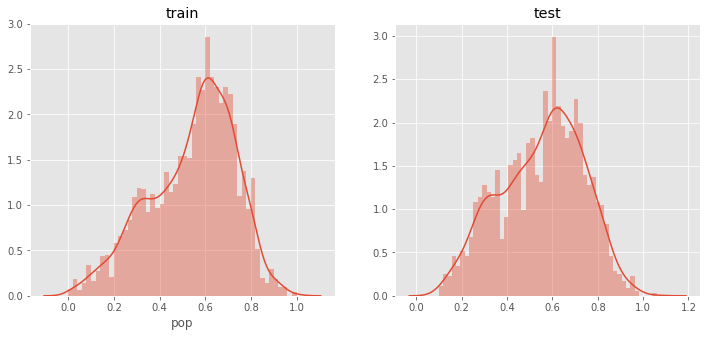

In [62]:
# 예측한 데이터를 시각화 해본다. 
fig,(ax1,ax2)= plt.subplots(ncols=2)
fig.set_size_inches(12,5)
sns.distplot(y_train,ax=ax1,bins=50)
ax1.set(title="train")
sns.distplot(predictions,ax=ax2,bins=50)
ax2.set(title="test")